In [2]:
import numpy as np
import pandas as pd

import torch 
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision

import matplotlib.pyplot as plt


In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [10]:
train = pd.read_csv(r"C:\Users\Tanya srivastava\Desktop\train_digits.csv")
X_test = pd.read_csv(r"C:\Users\Tanya srivastava\Desktop\test_digits.csv")


In [7]:
# sub = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

In [11]:
train.shape

(42000, 785)

In [12]:
from sklearn.model_selection import train_test_split

x_train, y_train = train.iloc[:, 1:].values , train.iloc[:, 0].values
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = .25)
x_test = X_test.values

In [13]:
x_train.shape

(31500, 784)

In [14]:
def plotting(x,y,index):
    plt.imshow(x[index])
    plt.xlabel(y[index])

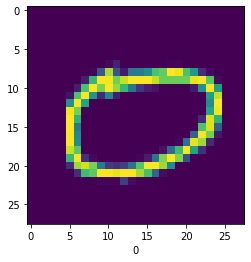

In [15]:
plotting(x_train.reshape((31500,28,28)), y_train, 9)

In [16]:
BATCH_SIZE = 256
LR = 0.001
epochs = 5
n_classes = 10
in_channels = 3

In [17]:
x_train = x_train/255
x_val = x_val/255
x_test = x_test/255

In [18]:
x_train = x_train.reshape(-1,28,28)
x_val = x_val.reshape(-1,28,28)
x_test = x_test.reshape(-1,28,28)


In [19]:
x_train = torch.from_numpy(x_train).type(torch.float32).unsqueeze(1)

x_val = torch.from_numpy(x_val).type(torch.float32).unsqueeze(1)
x_test = torch.from_numpy(x_test).type(torch.float32).unsqueeze(1)
y_train = torch.from_numpy(y_train)
y_val = torch.from_numpy(y_val)
train_ds = TensorDataset(x_train, y_train)
val_ds = TensorDataset(x_val, y_val)
train_loader = DataLoader(train_ds, batch_size = BATCH_SIZE, shuffle = True)
val_loader = DataLoader(val_ds, batch_size = BATCH_SIZE, shuffle = False)

In [20]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels =1, out_channels =6, kernel_size = (3,3), stride=(1,1), padding=(1,1))

        self.pool = nn.MaxPool2d(kernel_size= (2,2), stride= (2,2))

        self.conv2 = nn.Conv2d(in_channels = 6, out_channels =16, kernel_size = (3,3), stride=(1,1), padding=(1,1))
        self.fc1 = nn.Linear(16*7*7, 120)

        self.fc2 = nn.Linear(120, 80)
        self.fc3 = nn.Linear(80, 10)
    
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        #print(x.shape)

        x = self.pool(F.relu(self.conv2(x)))
        #print(x.shape)

        x = x.view(-1, 16*7*7)
        #print( x.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    

In [21]:
model = ConvNet()


In [22]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = LR)

In [ ]:
n_total_steps = len(train_loader)

for epoch in range (epochs):
    for i, (images,labels) in enumerate(train_loader):
        #print(images.shape)
        #images = images.reshape(images.shape[0], -1)
        #forward
        #outputs = model(images)
        #loss = loss_fn(outputs,labels)
        score  = model(images)
        loss = loss_fn(score, labels)
        #backward
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()
       
        print (f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/5], Step [1/124], Loss: 2.3055
Epoch [1/5], Step [2/124], Loss: 2.3001
Epoch [1/5], Step [3/124], Loss: 2.2962
Epoch [1/5], Step [4/124], Loss: 2.2922
Epoch [1/5], Step [5/124], Loss: 2.2850
Epoch [1/5], Step [6/124], Loss: 2.2664
Epoch [1/5], Step [7/124], Loss: 2.2648
Epoch [1/5], Step [8/124], Loss: 2.2517
Epoch [1/5], Step [9/124], Loss: 2.2450
Epoch [1/5], Step [10/124], Loss: 2.2299
Epoch [1/5], Step [11/124], Loss: 2.2271
Epoch [1/5], Step [12/124], Loss: 2.1897
Epoch [1/5], Step [13/124], Loss: 2.1806
Epoch [1/5], Step [14/124], Loss: 2.1714
Epoch [1/5], Step [15/124], Loss: 2.1434
Epoch [1/5], Step [16/124], Loss: 2.1078
Epoch [1/5], Step [17/124], Loss: 2.1081
Epoch [1/5], Step [18/124], Loss: 2.0500
Epoch [1/5], Step [19/124], Loss: 2.0105
Epoch [1/5], Step [20/124], Loss: 1.9808
Epoch [1/5], Step [21/124], Loss: 1.9103
Epoch [1/5], Step [22/124], Loss: 1.8488
Epoch [1/5], Step [23/124], Loss: 1.7940
Epoch [1/5], Step [24/124], Loss: 1.7172
Epoch [1/5], Step [25/124

In [ ]:
def check_acc (loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()
    
    with torch.no_grad():
        for x, y in loader:
            outputs = model(x)
            _, pred = outputs.max(1)
            num_correct += (pred==y).sum()
            num_samples += pred.size(0)
            print(f'Got {num_correct}/{num_samples} with accuracy {float(num_correct/float(num_samples)*100):.2f}')
        
    model.train()

In [ ]:
check_acc(train_loader, model)

In [ ]:
check_acc(val_loader, model)


In [ ]:
test_loader=DataLoader(x_test,batch_size=1)

In [ ]:
result=pd.DataFrame(columns=['ImageId','Label'])
serial=[]
ans=[]
model.eval()
for s,i in enumerate(test_loader):
    serial.append(s+1)
    ans.append(model(i).argmax())
result['ImageId']=serial    
result['Label']=np.array(ans)

In [ ]:
result.to_csv("result.csv",index=False)

In [ ]:
result


In [ ]:
import base64
import pandas as pd
from IPython.display import HTML

def create_download_link( df, title = "Download CSV file", filename = "result.csv"):
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

df = pd.DataFrame(data = [[1,2],[3,4]], columns=['Col 1', 'Col 2'])
create_download_link(df)
